In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = loadtxt('/content/drive/My Drive/LP-1/pima-indians-diabetes.csv', delimiter=',')
print(data)
print(data.ndim)
print(data.shape)
X = data[:, 0:8]
y = data[:,8]

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
2
(768, 9)


In [ ]:
model = Sequential()
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f200bb35b80>>

In [ ]:
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=50, batch_size=10)


Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: 26.3383 - accuracy: 0.6510
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 6.7551 - accuracy: 0.6289
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 1.5813 - accuracy: 0.5833
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8418 - accuracy: 0.6172
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.6380
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.6628
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6602
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6745
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6732
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6667
Epoch 11/50
77/77 

In [ ]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7148
loss: 54.78%
accuracy: 71.48%


In [ ]:
#make probability prediction with the model
prediction = model.predict(X)
#rounded prediction
rounded = [round(x[0]) for x in prediction ]

24/24 [==============================] - 0s 2ms/step


In [ ]:
for i in range(0, data.shape[0]):
  print("%s => %d (expected %d)" %(X[i].tolist(), prediction[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 0 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 0 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 0 (expect

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=1e1eda5bc22e13c2339675075b54eb2988cc4f13448d3bf6951e83ca1764527a
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


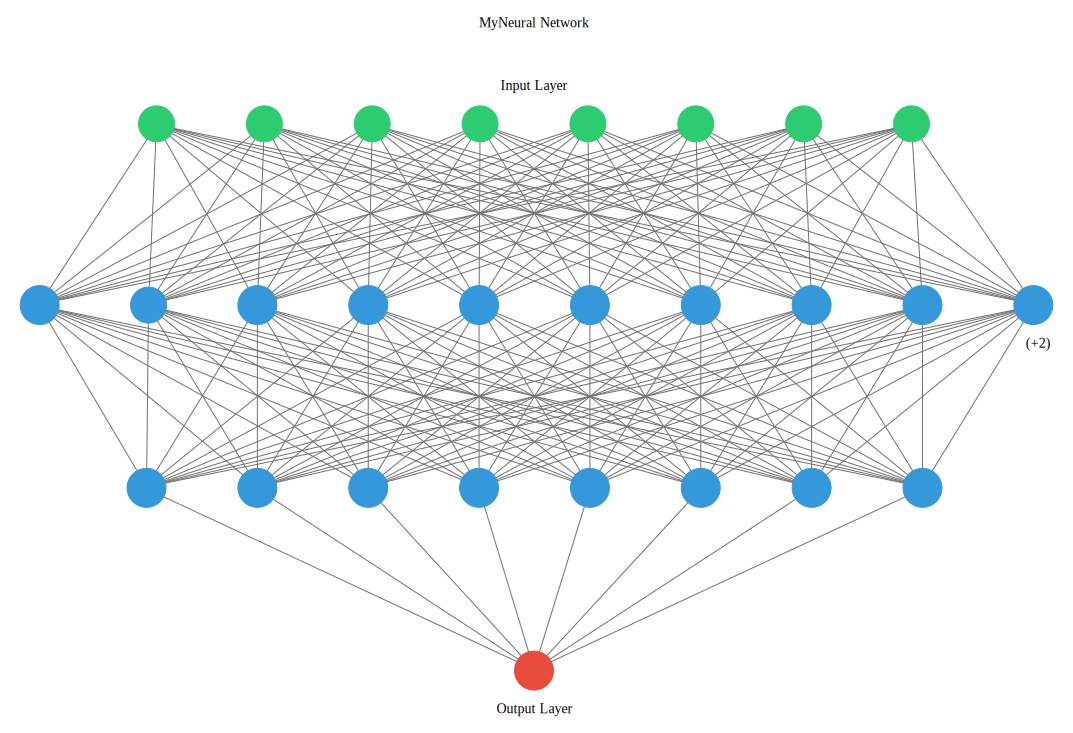

In [ ]:
from ann_visualizer.visualize import ann_viz;
from graphviz import Source;
ann_viz(model)
#ann_model_viz = Source.from_file('myANNmodel.gv')
#ann_viz(model, title="");
ann_viz(model, view=True, filename="myANNmodel.gv", title="MyNeural Network")
ann_model_viz = Source.from_file('myANNmodel.gv')
ann_model_viz